In [1]:
#dependecies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

#initialize dataframe
file_path = os.path.join('csv_files/cleaned_county_vs_crash_count')
df = pd.read_csv(file_path)

#remove unnamed column 
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,CountyName,StateName,CrashCount,Population
0,ABBEVILLE COUNTY,South Carolina,1,24527.0
1,ACCOMACK COUNTY,Virginia,5,32316.0
2,ADA COUNTY,Idaho,21,481587.0
3,ADAIR COUNTY,Oklahoma,11,22194.0
4,ADAMS COUNTY,Wisconsin,106,20220.0


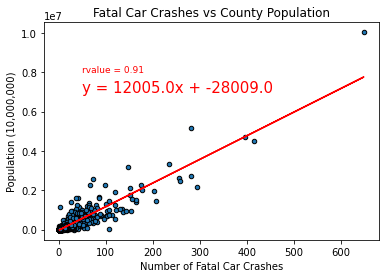

In [2]:
df.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'Fatal Car Crashes vs County Population',
        edgecolor='black'
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df.CrashCount, df.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * df.CrashCount + intercept

plt.annotate(line_eq, (50, 7000000), fontsize = 15, color='r')
plt.annotate(r_statement, (50, 8000000), fontsize = 9, color='r')
plt.plot(df.CrashCount, regress_values, color='r')

plt.ylabel('Population (10,000,000)')
plt.xlabel('Number of Fatal Car Crashes')

plt.show()

In [3]:
#function to find outliers 
def findOutliers(series):
    quartiles = series.quantile([.25,.50,.75])
    IQR = quartiles[.75] - quartiles[.25]
    upper_bound = quartiles[.75] + 1.5 * IQR
    lower_bound = quartiles[.25] - 1.5 * IQR
    
    print(f'The outliers are outside these bounds: ({lower_bound}, {upper_bound})')
    
    outlier_data = []
    for data in series:
        if((data > upper_bound) | (data < lower_bound)):
            outlier_data.append(data)
    return outlier_data

In [4]:
#grab population outliers
pop_outliers = findOutliers(df.Population)

The outliers are outside these bounds: (-85198.0, 177514.0)


In [5]:
#grab crash count outliers
crash_outliers = findOutliers(df.CrashCount)

The outliers are outside these bounds: (-9.0, 23.0)


In [6]:
print(len(pop_outliers), len(crash_outliers))
print(df.shape[0])

349 288
2645


In [7]:
#remove all outliers
no_outliers_df = df
for pop in pop_outliers:
    no_outliers_df = no_outliers_df[no_outliers_df.Population != pop]
for crash in crash_outliers:
    no_outliers_df = no_outliers_df[no_outliers_df.CrashCount != crash]
print(f'{df.shape[0] - no_outliers_df.shape[0]} outliers removed.')

398 outliers removed.


With that amount of data removed, very likely to have new outliers.
Checking new scatter for now.

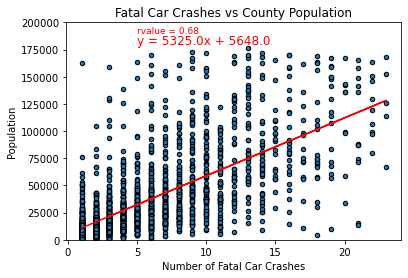

In [8]:
no_outliers_df.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'Fatal Car Crashes vs County Population',
        edgecolor='black'
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(no_outliers_df.CrashCount, no_outliers_df.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * no_outliers_df.CrashCount + intercept

plt.annotate(line_eq, (5, 180000), fontsize = 12, color='r')
plt.annotate(r_statement, (5, 190000), fontsize = 9, color='r')
plt.plot(no_outliers_df.CrashCount, regress_values, color='r')

plt.ylim(0,200000)
plt.ylabel('Population')
plt.xlabel('Number of Fatal Car Crashes')

plt.show()

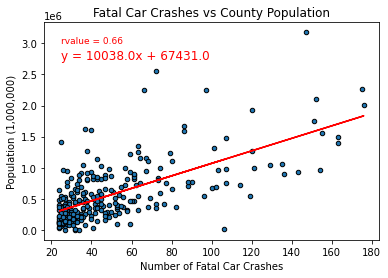

In [9]:
#I want to take a look at data > 23 since that is a very low number of crashes
#277 of the 398 outliers are contained in this dataframe

crashes = df[(df.CrashCount > 23) & (df.CrashCount < 200)]
crashes.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'Fatal Car Crashes vs County Population',
        edgecolor='black'
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(crashes.CrashCount, crashes.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * crashes.CrashCount + intercept

plt.annotate(line_eq, (25, 2750000), fontsize = 12, color='r')
plt.annotate(r_statement, (25, 3000000), fontsize = 9, color='r')
plt.plot(crashes.CrashCount, regress_values, color='r')

plt.ylabel('Population (1,000,000)')
plt.xlabel('Number of Fatal Car Crashes')

plt.show()

In [10]:
crashes.shape[0]

277

In [11]:
#bad counties
findingSpecific = df[(df.Population < 100000) & (df.CrashCount > 100)]
findingSpecific

,CountyName,StateName,CrashCount,Population
4,ADAMS COUNTY,Wisconsin,106,20220.0


In [12]:
#bad counties
findingSpecific = df[(df.Population < 3000000) & (df.CrashCount > 250)]
findingSpecific

,CountyName,StateName,CrashCount,Population
574,DALLAS COUNTY,Texas,255,2635516.0
1577,MIAMI-DADE COUNTY,Florida,282,2716940.0
2032,RIVERSIDE COUNTY,California,258,2470546.0
2091,SAN BERNARDINO COUNTY,California,294,2180085.0


In [13]:
#good counties 
findingSpecific = df[(df.Population > 150000) & (df.CrashCount < 5)]
findingSpecific

,CountyName,StateName,CrashCount,Population
345,CENTRE COUNTY,Pennsylvania,1,162385.0
724,FAIRFAX COUNTY,Virginia,2,1147532.0
2007,RENSSELAER COUNTY,New York,3,158714.0


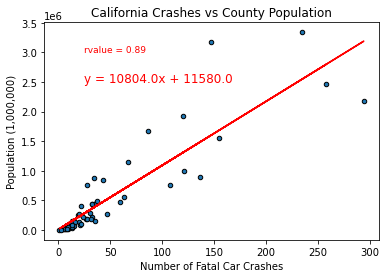

In [43]:
state_name = 'California'
state_df = df[df.StateName == state_name]

#california specific
state_df = state_df[state_df.Population < 5000000]

state_df.plot('CrashCount',
        'Population', 
        kind='scatter',
        title = 'California Crashes vs County Population',
        edgecolor='black'
       )

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(state_df.CrashCount, state_df.Population)
line_eq = f'y = {round(slope, 0)}x + {round(intercept, 0)}'
r_statement = f'rvalue = {round(rvalue, 2)}'
regress_values =  slope * state_df.CrashCount + intercept

plt.annotate(line_eq, (25, 2500000), fontsize = 12, color='r')
plt.annotate(r_statement, (25, 3000000), fontsize = 9, color='r')
plt.plot(state_df.CrashCount, regress_values, color='r')

plt.ylabel('Population (1,000,000)')
plt.xlabel('Number of Fatal Car Crashes')

plt.show()